In [1]:
import numpy as np
import scipy as sp
import netCDF4 as nc4
from skimage.transform import rescale, resize, downscale_local_mean


In [2]:
datapath_input = 'datasets/heightData/regridded.CA.4km.L15_topography.nc'


In [3]:
height_map = nc4.Dataset(datapath_input,'r')


In [14]:
list(height_map.variables['lat'])

[masked_array(data=34.,
              mask=False,
        fill_value=1e+20), masked_array(data=34.03125,
              mask=False,
        fill_value=1e+20), masked_array(data=34.0625,
              mask=False,
        fill_value=1e+20), masked_array(data=34.09375,
              mask=False,
        fill_value=1e+20), masked_array(data=34.125,
              mask=False,
        fill_value=1e+20), masked_array(data=34.15625,
              mask=False,
        fill_value=1e+20), masked_array(data=34.1875,
              mask=False,
        fill_value=1e+20), masked_array(data=34.21875,
              mask=False,
        fill_value=1e+20), masked_array(data=34.25,
              mask=False,
        fill_value=1e+20), masked_array(data=34.28125,
              mask=False,
        fill_value=1e+20), masked_array(data=34.3125,
              mask=False,
        fill_value=1e+20), masked_array(data=34.34375,
              mask=False,
        fill_value=1e+20), masked_array(data=34.375,
              

In [15]:
list(height_map.variables['lon'])

[masked_array(data=-125.,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.96875,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.9375,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.90625,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.875,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.84375,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.8125,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.78125,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.75,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.71875,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.6875,
              mask=False,
        fill_value=1e+20), masked_array(data=-124.65625,
              mask=False,
        fill_value=1e+20), masked_array(dat

In [5]:
height_map.variables.keys()

[u'lat', u'lon', u'topography']

In [6]:
height_map.variables['topography'][:]

masked_array(
  data=[[[-2147483648, -2147483648, -2147483648, ...,         481,
                  387,         393],
         [-2147483648, -2147483648, -2147483648, ...,         382,
                  339,         375],
         [-2147483648, -2147483648, -2147483648, ...,         318,
                  292,         316],
         ...,
         [-2147483648, -2147483648, -2147483648, ...,        2529,
                 2529,        2609],
         [-2147483648, -2147483648, -2147483648, ...,        2618,
                 2622,        2672],
         [-2147483648, -2147483648, -2147483648, ...,        2571,
                 2640,        2685]]],
  mask=False,
  fill_value=999999,
  dtype=int32)

In [7]:
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

/home/ashray/anaconda3/envs/torch27/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


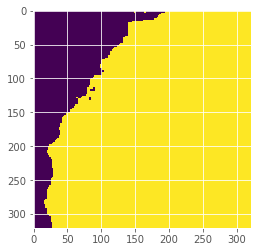

In [8]:
plt.imshow(height_map.variables['topography'][:][0,:,:])

In [9]:
harr = height_map.variables['topography'][:][0,:,:]


In [10]:
harr[harr < 0] = 0

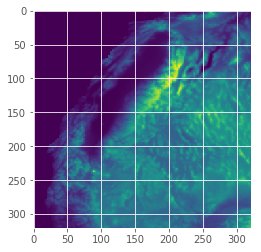

In [11]:
plt.imshow(harr)

In [12]:
height_map.variables.keys()

[u'lat', u'lon', u'topography']

/home/ashray/anaconda3/envs/torch27/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ashray/anaconda3/envs/torch27/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


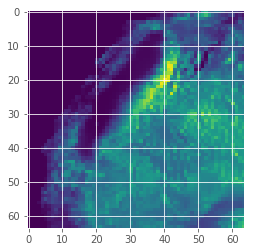

In [13]:
plt.imshow(resize(harr, (64, 64)))

In [14]:
np.save("height_array.npy", resize(harr, (64, 64)))

In [22]:
np.min(resize(harr, (64, 64), preserve_range = True))

0.0

In [17]:
np.max(rescale(harr, (64, 64)))

/home/ashray/anaconda3/envs/torch27/lib/python2.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


1.7293627085498167e-06

In [18]:
def plot_height_mask(height):
    plt.spy(harr > height)
    plt.show()
    
interact(plot_height_mask, height = (0, 4000, 1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yMDAwLCBkZXNjcmlwdGlvbj11J2hlaWdodCcsIG1heD00MDAwKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2XigKY=


<function __main__.plot_height_mask>